In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("car.data",header=None)  #header=none kodkkunne frstrow coulmn 
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
#SPECIFIYING COLUMNS NAMES
col_names=["buying","maint","doors","persons","lug_boot","safety","class"]
data.columns=col_names

In [4]:
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
data["doors"].value_counts()

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

In [8]:
data["persons"].value_counts()

persons
2       576
4       576
more    576
Name: count, dtype: int64

In [9]:
 ########## this method is to print all values value_count

col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(data[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
x=data.drop("class",axis=1)
y=data["class"]

In [11]:
x

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [12]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train=train_test_split(x,y,test_size=0.20,random_state=42)

In [14]:
#encoding for categorical columns  (oder matter cheyynne data for ordinal encoding)

In [15]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=["buying","maint","doors","persons","lug_boot","safety"])
x_train=encoder.fit_transform(x_train)
x_test=encoder.transform(x_test)

In [16]:
x_train

,buying,maint,doors,persons,lug_boot,safety
599,1,1,1,1,1,1
1201,2,2,2,2,1,2
628,1,1,3,1,2,2
1498,3,1,3,2,1,2
1263,2,2,1,3,1,3
...,...,...,...,...,...,...
100,4,3,3,3,3,2
274,4,4,1,1,1,2
1206,2,2,2,3,3,3
101,4,3,3,3,3,1


In [17]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
classifier=DecisionTreeClassifier()
classifier=classifier.fit(x_train,y_train)

In [18]:
y_predict=classifier.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9138929088277858
[[269  17  11   4]
 [ 19  33   0   6]
 [ 57   2 916   0]
 [  0   3   0  45]]
              precision    recall  f1-score   support

         acc       0.78      0.89      0.83       301
        good       0.60      0.57      0.58        58
       unacc       0.99      0.94      0.96       975
       vgood       0.82      0.94      0.87        48

    accuracy                           0.91      1382
   macro avg       0.80      0.83      0.81      1382
weighted avg       0.92      0.91      0.92      1382



In [20]:
print(classifier.score(x_train,y_train))

1.0


In [21]:
print(classifier.score(x_test,y_test))

0.9138929088277858


In [27]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
classifier1=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=45)
classifier1=classifier1.fit(x_train,y_train)  #training
y_pred1=classifier1.predict(x_test)
print(accuracy_score(y_pred1,y_test))

0.8010130246020261


In [28]:
print(classifier1.score(x_train,y_train))

0.8236994219653179


In [29]:
print(classifier1.score(x_test,y_test))

0.8010130246020261


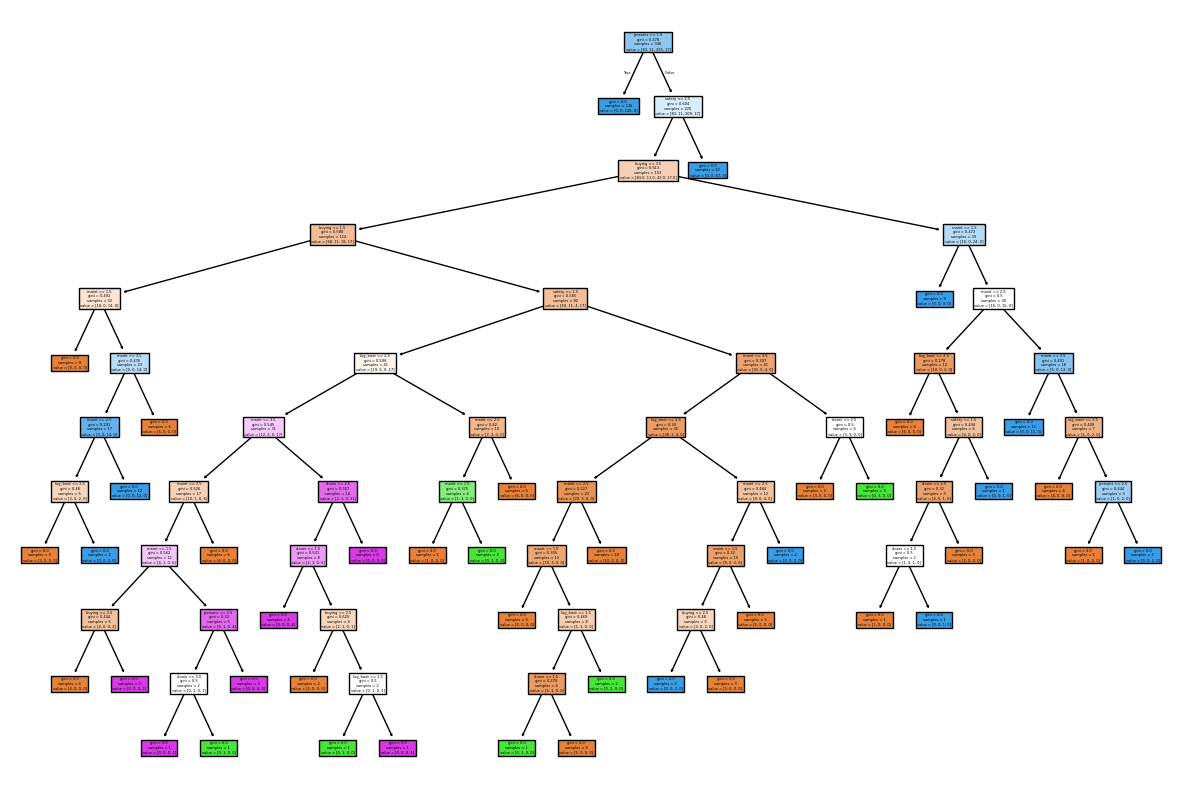

In [30]:
plt.subplots(figsize=(15,10))
plot_tree(classifier,feature_names=x.columns,filled=True)
plt.show()

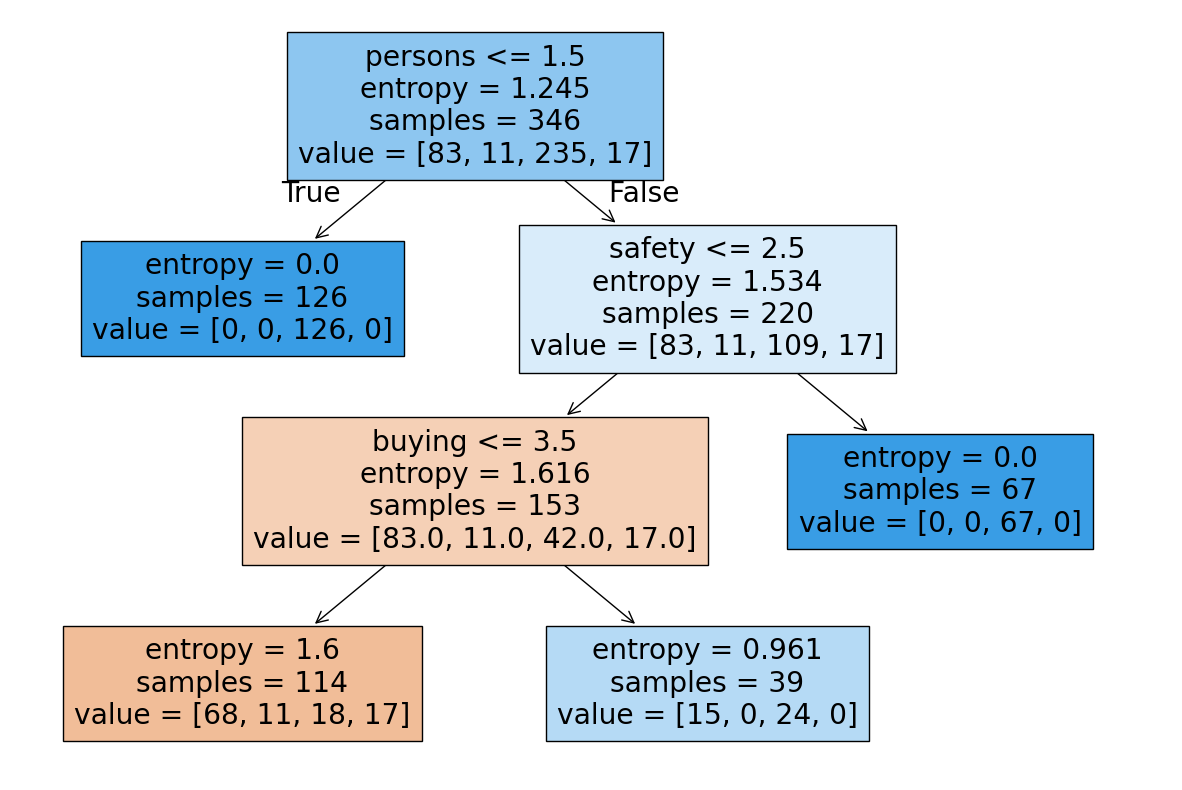

In [31]:
plt.subplots(figsize=(15,10))
plot_tree(classifier1,feature_names=x.columns,filled=True)
plt.show()